In [55]:
import pandas as pd
import numpy as np
import sqlite3
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

%matplotlib inline


In [8]:
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

In [9]:
cur.execute(
"""
SELECT name from sqlite_master
WHERE type="table";
""")

In [10]:
cur.fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [11]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is 240A-B5FC

 Directory of C:\Users\bonma1\Desktop\module3\dsc-mod-3-project-online-ds-pt-081219-master

11/21/2019  07:13 PM    <DIR>          .
11/21/2019  07:13 PM    <DIR>          ..
11/21/2019  07:06 PM                28 .gitignore
11/21/2019  07:13 PM    <DIR>          .ipynb_checkpoints
11/21/2019  07:06 PM                84 .learn
11/21/2019  07:06 PM           526,610 adventureworks2008_schema.gif
11/21/2019  07:06 PM             1,809 CONTRIBUTING.md
11/21/2019  07:06 PM         2,930,391 halfway-there.gif
11/21/2019  07:06 PM             1,348 LICENSE.md
11/21/2019  07:04 PM             1,660 Mod3 Project .ipynb
11/21/2019  07:06 PM            78,531 module3_project_rubric.pdf
11/21/2019  07:13 PM                 0 Northwind
11/21/2019  07:06 PM            96,050 Northwind_ERD.png
11/21/2019  07:06 PM            96,271 Northwind_ERD_updated.png
11/21/2019  07:11 PM           290,816 Northwind_small.sqlite
11/21/2019  07:06

In [24]:
cur.execute(
"""
SELECT * FROM OrderDetail
WHERE Discount = 0

""")
df_A = pd.DataFrame(cur.fetchall())
df_A.columns = [x[0] for x in cur.description]
df_A

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.0
1,10248/42,10248,42,9.80,10,0.0
2,10248/72,10248,72,34.80,5,0.0
3,10249/14,10249,14,18.60,9,0.0
4,10249/51,10249,51,42.40,40,0.0
...,...,...,...,...,...,...
1312,11077/52,11077,52,7.00,2,0.0
1313,11077/55,11077,55,24.00,2,0.0
1314,11077/66,11077,66,17.00,1,0.0
1315,11077/75,11077,75,7.75,4,0.0


In [28]:
df_A.groupby(['OrderId','ProductId'])['Quantity'].sum()

OrderId  ProductId
10248    11           12
         42           10
         72            5
10249    14            9
         51           40
                      ..
11077    52            2
         55            2
         66            1
         75            4
         77            2
Name: Quantity, Length: 1317, dtype: int64

In [25]:
cur.execute(
"""
SELECT * FROM OrderDetail
WHERE Discount IS NOT 0;

""")
df_B = pd.DataFrame(cur.fetchall())
df_B.columns = [x[0] for x in cur.description]
df_B

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10250/51,10250,51,42.40,35,0.15
1,10250/65,10250,65,16.80,15,0.15
2,10251/22,10251,22,16.80,6,0.05
3,10251/57,10251,57,15.60,15,0.05
4,10252/20,10252,20,64.80,40,0.05
...,...,...,...,...,...,...
833,11077/39,11077,39,18.00,2,0.05
834,11077/46,11077,46,12.00,3,0.02
835,11077/60,11077,60,34.00,2,0.06
836,11077/64,11077,64,33.25,2,0.03


In [29]:
df_B.groupby(['OrderId','ProductId'])['Quantity'].sum()

OrderId  ProductId
10250    51           35
         65           15
10251    22            6
         57           15
10252    20           40
                      ..
11077    39            2
         46            3
         60            2
         64            2
         73            2
Name: Quantity, Length: 838, dtype: int64

### Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

H0: Discount amount does not have a significant effect on the quantity of a product in an order
H1: Discount amount does have a significant effect on the quantity of a product in an order

In [ ]:
#Product, Order, Discount, Quantity 

In [32]:
cur.execute(
"""
SELECT OrderId, Sum(Quantity) as quantity, Avg(Discount) as avg_dis FROM OrderDetail

GROUP BY OrderId


""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,OrderId,quantity,avg_dis
0,10248,27,0.000000
1,10249,49,0.000000
2,10250,60,0.100000
3,10251,41,0.033333
4,10252,105,0.033333
...,...,...,...
825,11073,30,0.000000
826,11074,14,0.050000
827,11075,42,0.150000
828,11076,50,0.250000


In [35]:
#A: NO DISCOUNT
#B: HAS DISCOUNT
df_nodiscount = df[df['avg_dis']==0]

df_discount= df[df['avg_dis']>0]

In [39]:
a=df_nodiscount['quantity']


0       27
1       49
5      102
7      110
8       27
      ... 
818     80
819      9
821     20
824    200
825     30
Name: quantity, Length: 450, dtype: int64

In [38]:
b=df_discount['quantity']

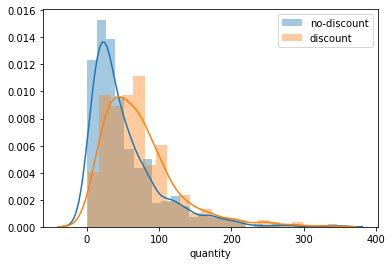

In [51]:
sns.distplot(a, label='no-discount')
sns.distplot(b, label='discount')
plt.legend()

#### Because of Central Limit Theorem, we can 2 Sample T Test

In [56]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-5.91731561103876, pvalue=4.7876655924928625e-09)

#### Non Parametric KS Test

In [58]:
#the distributions
stats.ks_2samp(a,b)

Ks_2sampResult(statistic=0.26900584795321636, pvalue=1.2856382625159313e-13)

#### Mann-Whitney Test

In [59]:
#same with t-test
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=59105.0, pvalue=8.524065415288705e-15)

In [ ]:
#Confidence level of 95%
alpha = 0.05

Reject the null. 

### Effect Size

In [60]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [62]:
abs(Cohen_d(a,b))

0.4122521666326047

### Cohen's D shows the difference is small to medium

### Next examine different levels of discount (one-way ANOVA)